In [474]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [475]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


I can see that we need to make a model to precict the sales meaning we have a regression problem on hand.

In [476]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [477]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

As there are 5 different values in Item_Fat_Content, but they aree actually 2 i.e. Low Fat and Regular. LF and reg are shortforms of Low Fat and Regular respectively. and 5th value is just problem of lower and upper case.

In [478]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(['LF'],'Low Fat')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(['reg'],'Regular')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(['low fat'],'Low Fat')

In [479]:
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

After correcting the values in Item_Fat_Content, we have two unique values left.

In [480]:
data['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
FDW26     9
DRE49     9
FDF52     9
         ..
FDY43     1
FDN52     1
DRF48     1
FDT35     1
FDO33     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [481]:
data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [482]:
data['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [483]:
data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [484]:
data['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [485]:
data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

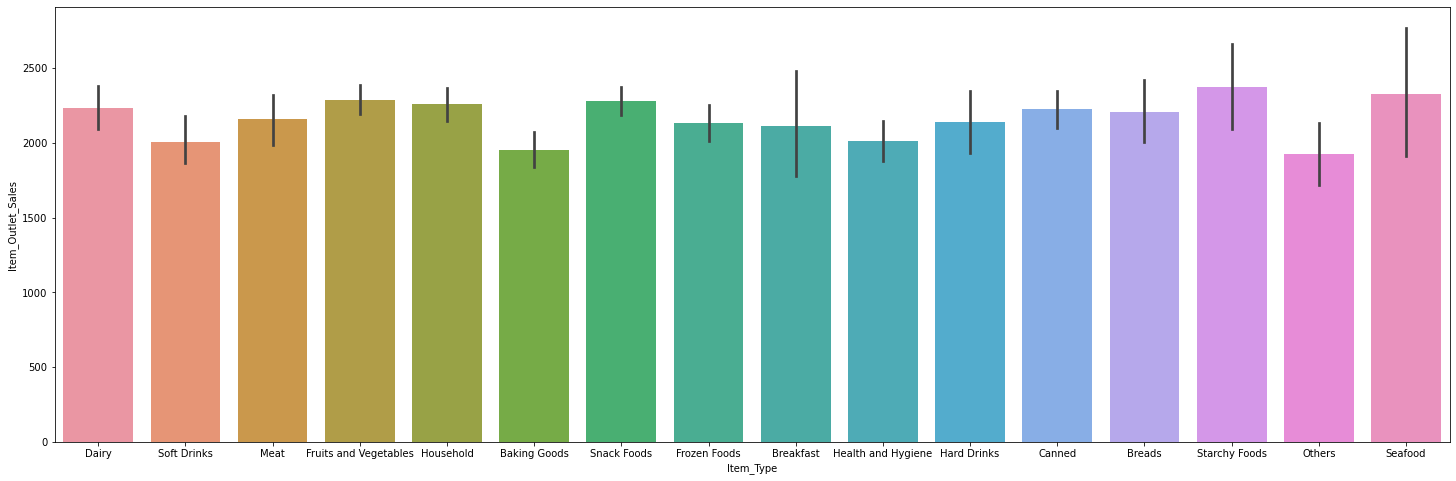

In [486]:
fig, ax = plt.subplots(figsize=(25,8))
sns.barplot(data=data, x='Item_Type', y='Item_Outlet_Sales')

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

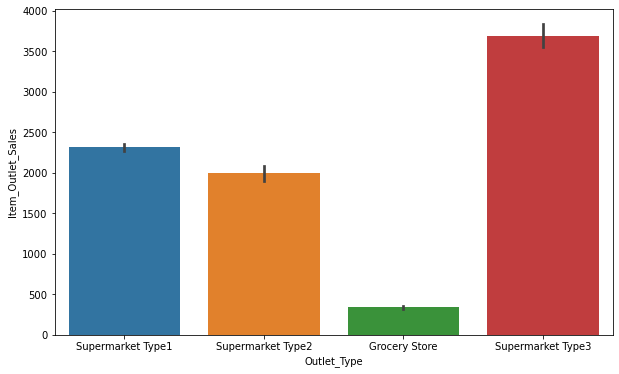

In [487]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=data, x='Outlet_Type', y='Item_Outlet_Sales')

Supermarket type 3 has the highest sales among all types of outlets.

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

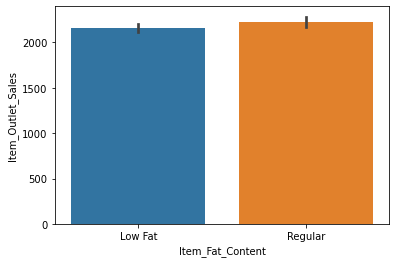

In [488]:
sns.barplot(data=data, x='Item_Fat_Content', y='Item_Outlet_Sales')

Sales wise, both Low Fat and Regular Fat ites have almost same figures.

I confirmed that now in categorical columns there are no corrections in needed.

In [489]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are two columns with missing data. Item_weight which i will use median to fill NaN and Outlet_Type with mode as its categorical predictor.

In [490]:
data['Outlet_Size'] = data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])
data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].median())

In [491]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Once I filled NaN values, now there are no missing values in the dataset.

In [492]:
data.skew()

Item_Weight                  0.121845
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

As we can see there is very small skewness in the numerical features but its not that big that we need to tranform the features.

In [493]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


1. most of the variable have mean and median very close meaning data is centrally distributed.
2. The values in different variables are having different scale hence i will apply scale the entire dataset.

There are total 5 variables which are categorical Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, and Outlet_Type Hence i will encode them using encoder.

In [494]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
data['Item_Identifier'] = LE.fit_transform(data['Item_Identifier'])
data['Item_Fat_Content'] = LE.fit_transform(data['Item_Fat_Content'])
data['Item_Type'] = LE.fit_transform(data['Item_Type'])
data['Outlet_Identifier'] = LE.fit_transform(data['Outlet_Identifier'])
data['Outlet_Size'] = LE.fit_transform(data['Outlet_Size'])
data['Outlet_Type'] = LE.fit_transform(data['Outlet_Type'])
data['Outlet_Location_Type'] = LE.fit_transform(data['Outlet_Location_Type'])
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


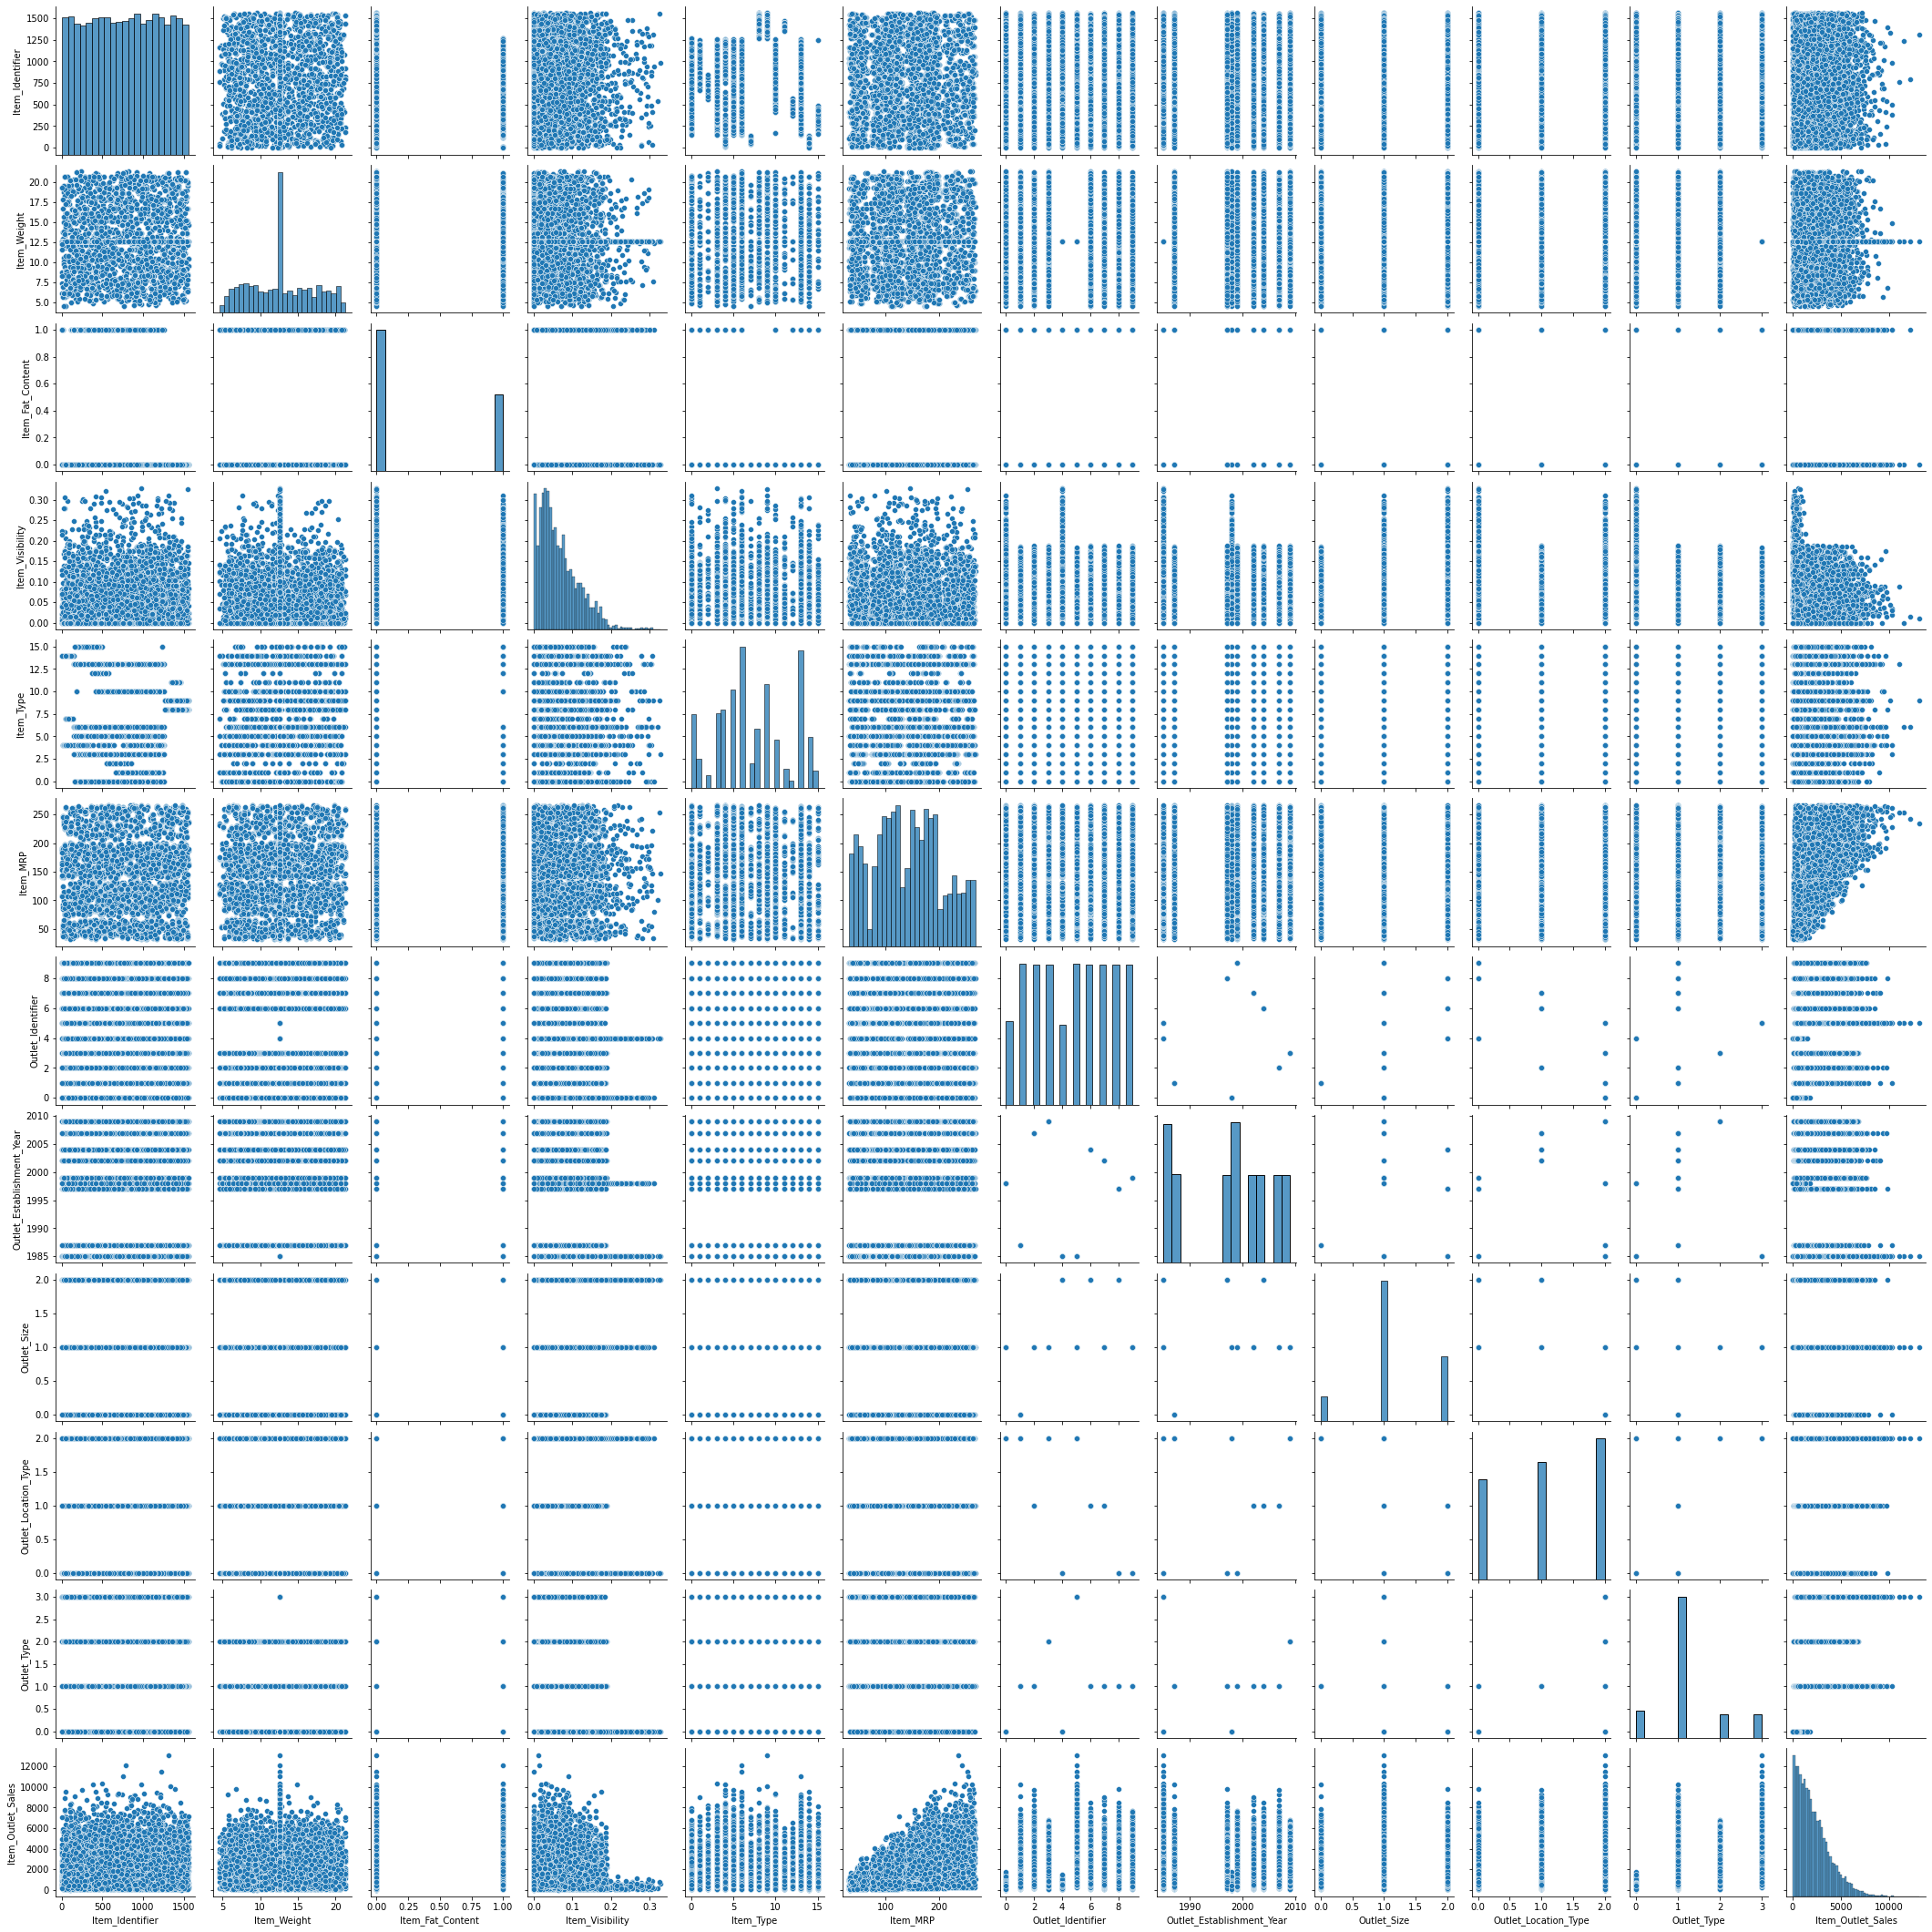

In [495]:
sns.pairplot(data)

In [496]:
cor = data.corr()
cor

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044218,-0.114660,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.001389,0.003656,-0.001178,0.002869
Item_Weight,0.044218,1.000000,-0.021092,-0.014168,0.028038,0.024951,-0.007666,0.007739,-0.010536,0.001958,-0.009973,0.009693
Item_Fat_Content,-0.114660,-0.021092,1.000000,0.047314,-0.139434,0.006063,0.000764,0.003151,-0.000622,-0.001598,0.002199,0.018719
Item_Visibility,-0.025482,-0.014168,0.047314,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028038,-0.139434,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024951,0.006063,-0.001315,0.032651,1.000000,0.003319,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007666,0.000764,-0.100439,0.001656,0.003319,1.000000,0.079035,0.504603,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,0.007739,0.003151,-0.074834,0.004970,0.005020,0.079035,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,0.001389,-0.010536,-0.000622,0.069309,-0.001859,0.006059,0.504603,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.003656,0.001958,-0.001598,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.614311,1.000000,0.467219,0.089367


<AxesSubplot:>

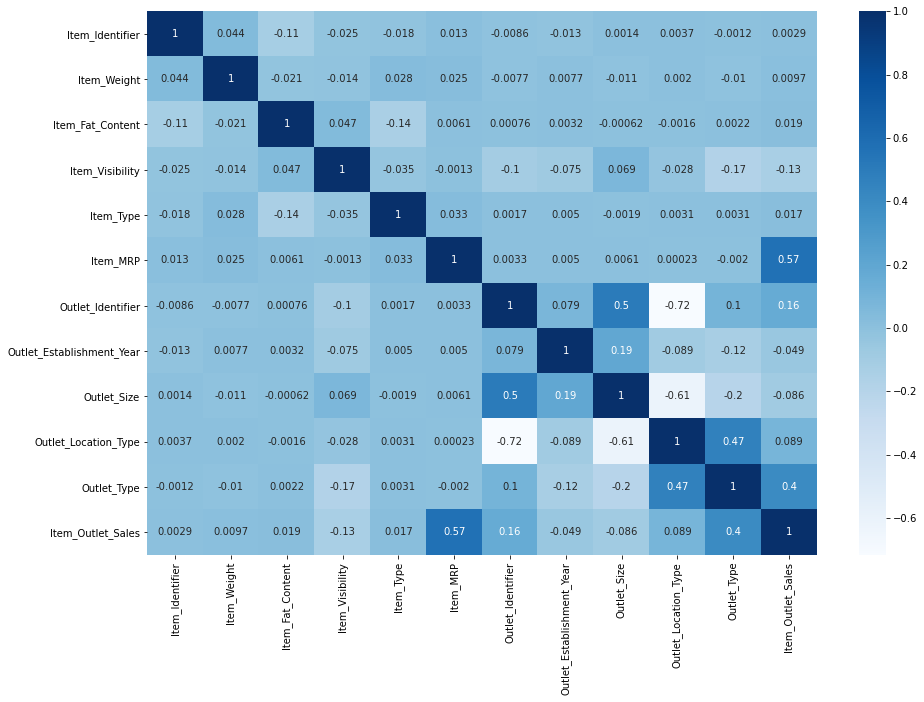

In [497]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data=cor, annot=True, cmap='Blues')

From Heatmap and paiplot, I don't find any problem of multicollinearity in the data set. Except Item_MRP, there is no other variable which is contributing better to the target variable, which makes them very less useful compare to item_MRP.

In [498]:
from scipy.stats import zscore
z=np.abs(zscore(data))

threshold=3
print(np.where(z>3))

data_new=data[(z<3).all(axis=1)]
data_new.shape

(array([  49,   83,  108,  130,  145,  174,  276,  304,  333,  373,  434,
        456,  472,  502,  521,  532,  661,  694,  753,  809,  854,  935,
        991,  997, 1009, 1138, 1159, 1254, 1272, 1291, 1311, 1324, 1434,
       1450, 1496, 1501, 1506, 1560, 1575, 1644, 1651, 1805, 1827, 1841,
       1859, 1998, 2088, 2109, 2122, 2216, 2238, 2251, 2293, 2324, 2439,
       2445, 2516, 2535, 2586, 2613, 2728, 2776, 2855, 2895, 3017, 3083,
       3087, 3098, 3154, 3206, 3234, 3286, 3399, 3407, 3458, 3474, 3488,
       3497, 3540, 3667, 3709, 3720, 3750, 3757, 3767, 3884, 3993, 4006,
       4219, 4289, 4346, 4349, 4382, 4408, 4530, 4656, 4674, 4676, 4681,
       4772, 4789, 4888, 4941, 4961, 4991, 5031, 5065, 5150, 5177, 5185,
       5223, 5287, 5315, 5374, 5500, 5550, 5619, 5732, 5734, 5752, 5795,
       5799, 5812, 5837, 5880, 5891, 5946, 5977, 6000, 6008, 6012, 6134,
       6179, 6334, 6409, 6536, 6537, 6541, 6576, 6606, 6622, 6674, 6786,
       6886, 6903, 6993, 7005, 7016, 7076, 7088, 7

(8338, 12)

In [499]:
data_new.skew()

Item_Identifier             -0.007837
Item_Weight                  0.118615
Item_Fat_Content             0.620973
Item_Visibility              0.794272
Item_Type                    0.098295
Item_MRP                     0.138990
Outlet_Identifier           -0.065135
Outlet_Establishment_Year   -0.423379
Outlet_Size                 -0.087933
Outlet_Location_Type        -0.202674
Outlet_Type                  0.956727
Item_Outlet_Sales            0.878267
dtype: float64

Even after removing the outliers, it seems there is skewness in the data hence i will use scaler to scale the data. But before that I have to seperate x_train and y_train so that only predictors will be scaled.

In [500]:
x = data_new.iloc[:,:-1]
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,1,0.000000,6,182.0950,0,1998,1,2,0
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,1,1,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2


In [501]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()

dataset = st.fit_transform(x)
dataset

scaled_data = pd.DataFrame(dataset)
scaled_data

,0,1,2,3,4,5,6,7,8,9,10
0,-1.386901,-0.827157,-0.736645,-1.011507,-0.766589,1.771831,1.496012,0.120549,-0.278874,-1.370345,-0.259839
1,-1.715672,-1.621813,1.357506,-0.943320,1.610171,-1.482939,-0.615022,1.322724,-0.278874,1.099060,1.022134
2,-0.262861,1.100706,-0.736645,-0.996464,0.659467,0.024597,1.496012,0.120549,-0.278874,-1.370345,-0.259839
3,0.756773,1.500385,1.357506,-1.350181,-0.291237,0.678281,-1.670540,0.000332,-0.278874,1.099060,-1.541811
4,1.147744,-0.914146,-0.736645,-1.350181,0.421791,-1.392628,-1.318700,-1.322060,-1.940955,1.099060,-0.259839
...,...,...,...,...,...,...,...,...,...,...,...
8333,-0.911516,-1.399639,-0.736645,-0.151783,1.372495,1.201957,-1.318700,-1.322060,-1.940955,1.099060,-0.259839
8334,0.259174,-1.043454,1.357506,-0.358630,-1.717294,-0.515781,0.792334,0.481201,-0.278874,-0.135643,-0.259839
8335,1.281030,-0.521520,-0.736645,-0.607585,0.184115,-0.887778,0.440495,0.721636,1.383207,-0.135643,-0.259839
8336,-0.220653,-1.318527,1.357506,1.714661,1.372495,-0.596913,-0.615022,1.322724,-0.278874,1.099060,1.022134


In [502]:
y = data_new.iloc[:,-1]
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8338, dtype: float64

In [503]:
from sklearn.metrics import r2_score

maxscore=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=i)
    mod = LinearRegression()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    r2score = r2_score(y_test,pred)
    if r2score>maxscore:
        maxscore=r2score
        maxRS=i
print("Best r2 score is ", maxscore, 'on Random state ', maxRS)

Best r2 score is  0.5280871739295583 on Random state  50


In [504]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=154)

In [505]:
x_test.shape

(2502, 11)

In [506]:
y_test.shape

(2502,)

In [507]:
x_train.shape

(5836, 11)

In [508]:
y_train.shape

(5836,)

In [509]:
model=[LinearRegression(),KNeighborsRegressor(), DecisionTreeRegressor(), SVR(), RandomForestRegressor()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    m_pred=m.predict(x_test)
    r2sscore = r2_score(y_test,m_pred)
    MSE= mean_squared_error(y_test,m_pred)
    
    print(m)
    print(m.score(x_train,y_train))
    print('R2 score for :', m, 'is', r2sscore)
    print('Mean Squared Error for ',m ,"is:" ,MSE)
    print("\n")

LinearRegression()
0.5011591103629083
R2 score for : LinearRegression() is 0.49382462930437077
Mean Squared Error for  LinearRegression() is: 1247302.119339307


KNeighborsRegressor()
0.4654513936865251
R2 score for : KNeighborsRegressor() is 0.18385784517854908
Mean Squared Error for  KNeighborsRegressor() is: 2011112.9429153295


DecisionTreeRegressor()
1.0
R2 score for : DecisionTreeRegressor() is 0.17138862214236394
Mean Squared Error for  DecisionTreeRegressor() is: 2041839.2271637593


SVR()
-0.042278637518149864
R2 score for : SVR() is -0.034886813295342156
Mean Squared Error for  SVR() is: 2550136.9490294093


RandomForestRegressor()
0.9370363149666765
R2 score for : RandomForestRegressor() is 0.5347437333840961
Mean Squared Error for  RandomForestRegressor() is: 1146470.494185429




In [510]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
for i in model:
    kfold=KFold(5)
    score=cross_val_score(i,scaled_data,y,cv=kfold)
    print(i, "CV Score is ",score.mean())

LinearRegression() CV Score is  0.497076207344236
KNeighborsRegressor() CV Score is  0.48994412407712007
DecisionTreeRegressor() CV Score is  0.12557324977824857
SVR() CV Score is  0.051842754283637674
RandomForestRegressor() CV Score is  0.5360316733273987


When comparing R2 score with CV score, LinearRegression, KNeighborsRegressor,SVR, and RandomForestRegressor has 0% difference. Hence, i will go with RandomForestRegressor as it has the highest R2 score whitout any over or under fitting.

In [511]:
from sklearn.model_selection import GridSearchCV

In [512]:
parameters = {'n_estimators' : np.arange(1,20),
             'max_features' : ["auto","sqrt","log2"],
             'min_samples_split': np.arange(1,20),
             'bootstrap' : [True, False],
             'oob_score' : [True, False] }

In [513]:
#GSV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)
#GSV.fit(x_train,y_train)

In [514]:
GSV.best_params_

{'bootstrap': True,
 'max_features': 'log2',
 'min_samples_split': 17,
 'n_estimators': 18,
 'oob_score': True}

In [515]:
Final_Model = RandomForestRegressor(bootstrap= True, max_features= 'log2', min_samples_split= 17, n_estimators= 18, oob_score=True)
Final_Model.fit(x_train,y_train)
Final_Model.score(x_train,y_train)
model_pred=Final_Model.predict(x_test)
r2score = r2_score(y_test,model_pred)
MSE= mean_squared_error(y_test,model_pred)

print(Final_Model.score(x_train,y_train))
print('R2 score is :',r2score)
print('Mean Squared Error is ',MSE) 

0.7439241182467574
R2 score is : 0.5655052885567922
Mean Squared Error is  1070668.79544148


With the Hyperparameter tuning we improved R2 score to 0.57. 

In [516]:
import joblib
joblib.dump(Final_Model,'Big datamart.obj')

['Big datamart.obj']

In [517]:
conc = pd.DataFrame([Final_Model.predict(x_test)[:], model_pred[:]], index=['Predicted','Original'])
conc

,0,1,2,3,4,5,6,7,8,9,...,2492,2493,2494,2495,2496,2497,2498,2499,2500,2501
Predicted,2317.213664,410.034245,193.816574,930.749272,2489.061743,244.070019,1191.542935,3446.907957,2597.10605,2167.811944,...,1761.344607,1177.487749,3738.812406,711.585731,3279.507826,3086.571492,2585.971011,2905.468687,1925.963415,1850.562175
Original,2317.213664,410.034245,193.816574,930.749272,2489.061743,244.070019,1191.542935,3446.907957,2597.10605,2167.811944,...,1761.344607,1177.487749,3738.812406,711.585731,3279.507826,3086.571492,2585.971011,2905.468687,1925.963415,1850.562175


In [518]:
prediction_Data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')
prediction_Data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [519]:
prediction_Data['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [520]:
prediction_Data['Item_Fat_Content'] = prediction_Data['Item_Fat_Content'].replace(['LF'],'Low Fat')
prediction_Data['Item_Fat_Content'] = prediction_Data['Item_Fat_Content'].replace(['reg'],'Regular')
prediction_Data['Item_Fat_Content'] = prediction_Data['Item_Fat_Content'].replace(['low fat'],'Low Fat')

In [521]:
prediction_Data['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [530]:
prediction_Data.isnull().sum()

Item_Identifier                0
Item_Weight                  976
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [531]:
prediction_Data['Outlet_Size'] = prediction_Data['Outlet_Size'].fillna(prediction_Data['Outlet_Size'].mode()[0])
prediction_Data['Item_Weight'] = prediction_Data['Item_Weight'].fillna(prediction_Data['Item_Weight'].median())

In [532]:
prediction_Data['Item_Identifier'] = LE.fit_transform(prediction_Data['Item_Identifier'])
prediction_Data['Item_Fat_Content'] = LE.fit_transform(prediction_Data['Item_Fat_Content'])
prediction_Data['Item_Type'] = LE.fit_transform(prediction_Data['Item_Type'])
prediction_Data['Outlet_Identifier'] = LE.fit_transform(prediction_Data['Outlet_Identifier'])
prediction_Data['Outlet_Size'] = LE.fit_transform(prediction_Data['Outlet_Size'])
prediction_Data['Outlet_Type'] = LE.fit_transform(prediction_Data['Outlet_Type'])
prediction_Data['Outlet_Location_Type'] = LE.fit_transform(prediction_Data['Outlet_Location_Type'])
prediction_Data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300,1,0.038428,4,87.3198,2,2007,3,1,1
2,1406,14.600,0,0.099575,11,241.7538,0,1998,3,2,0
3,809,7.315,0,0.015388,13,155.0340,2,2007,3,1,1
4,1184,12.500,1,0.118599,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500,1,0.013496,13,141.3154,8,1997,2,0,1
5677,306,7.600,1,0.142991,15,169.1448,3,2009,1,2,2
5678,1412,10.000,0,0.073529,8,118.7440,7,2002,3,1,1
5679,517,15.300,1,0.000000,3,214.6218,2,2007,3,1,1


In [533]:
prediction_Data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [539]:
predictions = pd.DataFrame([Final_Model.predict(prediction_Data)[:]], index= ['Predicted'])
predictions

,0,1,2,3,4,5,6,7,8,9,...,5671,5672,5673,5674,5675,5676,5677,5678,5679,5680
Predicted,1649.189041,1456.543753,794.647096,1921.299033,4628.930763,1850.423936,796.868282,2074.840463,1534.378952,3357.421745,...,887.355681,3875.267353,1677.854263,818.861121,1146.035269,2094.492386,2673.102,1820.921404,3557.987117,1259.082165
